$$
f_{\theta}(x)=\theta_{0}+\theta_{1} x+\theta_{2} x^{2}
$$
$$
\theta_{j}:=\theta_{j}-\eta \sum_{i=1}^{n}\left(f_{\theta}\left(\boldsymbol{x}^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic

In [12]:
# 读入训练数据
train = np.loadtxt('data/click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]


In [13]:
# 标准化
mu = train_x.mean()
sigma = train_x.std()


def standardize(x):
    return (x - mu) / sigma


train_z = standardize(train_x)


In [14]:
# 预测函数一元多次项：f(x)=theta0+theta1*x+theta*x^2
# 创建X 向量： x^0，x^1，x^2 向量
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T


X = to_matrix(train_z)


$$
\boldsymbol{X}=\left[\begin{array}{c}
\boldsymbol{x}^{(1)^{\mathrm{T}}} \\
\boldsymbol{x}^{(2)^{\mathrm{T}}} \\
\boldsymbol{x}^{(3)^{\mathrm{T}}} \\
\vdots \\
\boldsymbol{x}^{(n)^{\mathrm{T}}}
\end{array}\right]=\left[\begin{array}{ccc}
1 & x^{(1)} & x^{(1)^{2}} \\
1 & x^{(2)} & x^{(2)^{2}} \\
1 & x^{(3)} & x^{(3)^{2}} \\
& \vdots & \\
1 & x^{(n)} & x^{(n)^{2}}
\end{array}\right]
$$
$$
\boldsymbol{X} \boldsymbol{\theta}=\left[\begin{array}{ccc}
1 & x^{(1)} & x^{(1)^{2}} \\
1 & x^{(2)} & x^{(2)^{2}} \\
1 & x^{(3)} & x^{(3)^{2}} \\
& \vdots & \\
1 & x^{(n)} & x^{(n)^{2}}
\end{array}\right]\left[\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\theta_{2}
\end{array}\right]=\left[\begin{array}{c}
\theta_{0}+\theta_{1} x^{(1)}+\theta_{2} x^{(1)^{2}} \\
\theta_{0}+\theta_{1} x^{(2)}+\theta_{2} x^{(2)^{2}} \\
\vdots \\
\theta_{0}+\theta_{1} x^{(n)}+\theta_{2} x^{(n)^{2}}
\end{array}\right]
$$

In [15]:
# 预测函数
def f(x):
    return np.dot(x, theta)

# 损失函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

#MSE 均方误差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)


In [16]:
# 学习率
ETA = 1e-3

# 误差的差值
diff = 1

# 更新次数
count = 0

# 参数初始化，产生三个参数，theta0，theta1，theta2
theta = np.random.rand(3)
errors = []


$$
\theta_{j}:=\theta_{j}-\eta \sum_{i=1}^{n}\left(f_{\theta}\left(\boldsymbol{x}^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$
$$
\boldsymbol{f}=\left[\begin{array}{c}
f_{\theta}\left(\boldsymbol{x}^{(1)}\right)-y^{(1)} \\
f_{\theta}\left(\boldsymbol{x}^{(2)}\right)-y^{(2)} \\
\vdots \\
f_{\theta}\left(\boldsymbol{x}^{(n)}\right)-y^{(n)}
\end{array}\right]
$$
$$
\sum_{i=1}^{n}\left(f_{\theta}\left(\boldsymbol{x}^{(i)}\right)-y^{(i)}\right) x_{0}^{(i)}=\boldsymbol{f}^{\mathrm{T}} \boldsymbol{x}_{0}
$$


In [17]:
# 直到误差的差值小于 0.01 为止，重复参数更新
error = MSE(X, train_y)
errors.append(error)
fig = plt.figure()
ims = []
plt.xlim(-3, 3)
plt.ylim(0, 700)
x = np.linspace(-3, 3, 100)
while diff > 1e-2:
    # 更新结果保存到临时变量
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # 计算与上一次误差的差值
    errors.append(MSE(X, train_y))
    diff = errors[-2]-errors[-1]

    # 输出日志
    count += 1
    # log = '第 {} 次 : theta = {}, 差值 = {:.4f}'
    # print(log.format(count, theta, diff))
    # 动态显示f(x)变化图
    im = plt.plot(train_z, train_y, 'o', color="blue") + \
        plt.plot(x, f(to_matrix(x)))
    ims.append(im)
ani = animation.ArtistAnimation(fig, ims, interval=20, repeat_delay=1000)
ani.save("regression2_polynomial.gif", writer='pillow')


第 1 次 : theta = [9.5306156  2.35770154 9.88345759], 差值 = 15230.0659
第 2 次 : theta = [17.72533413  4.19383302 18.26117986], 差值 = 13712.5096
第 3 次 : theta = [25.58860385  6.00486329 26.11255011], 差值 = 12354.5855
第 4 次 : theta = [33.13758077  7.79056424 33.46709486], 差值 = 11139.2888
第 5 次 : theta = [40.38848726  9.55075326 40.35271077], 差值 = 10051.4323
第 6 次 : theta = [47.3566633  11.2852901  46.79575437], 差值 = 9077.4518
第 7 次 : theta = [54.05661495 12.99407388 52.8211269 ], 差值 = 8205.2324
第 8 次 : theta = [60.50206011 14.67704027 58.45235442], 差值 = 7423.9538
第 9 次 : theta = [66.70597182 16.33415887 63.71166354], 差值 = 6723.9514
第 10 次 : theta = [72.68061911 17.96543072 68.620053  ], 差值 = 6096.5928
第 11 次 : theta = [78.43760567 19.57088595 73.19736128], 差值 = 5534.1674
第 12 次 : theta = [83.98790633 21.15058164 77.46233048], 差值 = 5029.7880
第 13 次 : theta = [89.34190159 22.70459971 81.43266674], 差值 = 4577.3023
第 14 次 : theta = [94.50941023 24.23304499 85.12509724], 差值 = 4171.2149
第 15 次 : thet

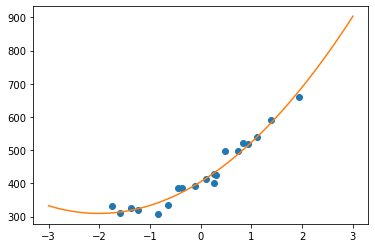

In [18]:
# 绘图确认
plt.clf()
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()


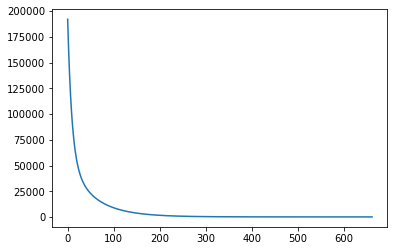

In [19]:
# MSE 不断在下降
x=np.arange(len(errors))
plt.plot(x,errors)
plt.show()

[regression2_polynomial.py](regression2_polynomial.py)加了动态显示梯度下降的过程